<a href="https://colab.research.google.com/github/Erenkardogan/SmiLe/blob/main/CNN(DER%C4%B0NMODEL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.15.0


In [ ]:
positive_path = '/content/drive/MyDrive/SMILEs/positives/positives7'
negative_path = '/content/drive/MyDrive/SMILEs/negatives/negatives7'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if img is not None:
            images.append(img)
    return images

pos_images = load_images_from_folder(positive_path)
neg_images = load_images_from_folder(negative_path)

In [ ]:
# Verileri etiketliyoruz
pos_labels = [1] * len(pos_images)
neg_labels = [0] * len(neg_images)

In [ ]:
from sklearn.model_selection import train_test_split

images = pos_images + neg_images
labels = pos_labels + neg_labels

images = np.array(images)
labels = np.array(labels)

print(images.shape)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_test = X_test / 255.0

(13165, 64, 64)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model oluşturma
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout kullanarak overfitting'i önleyelim
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Veriyi arttırma işlemi yapılır
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Early stopping yaptırılır
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping])

Epoch 1/10
330/330 [==============================] - 73s 218ms/step - loss: 0.4955 - accuracy: 0.7694 - val_loss: 0.3160 - val_accuracy: 0.8811
Epoch 2/10
330/330 [==============================] - 73s 221ms/step - loss: 0.2933 - accuracy: 0.8844 - val_loss: 0.2417 - val_accuracy: 0.9035
Epoch 3/10
330/330 [==============================] - 76s 229ms/step - loss: 0.2474 - accuracy: 0.9043 - val_loss: 0.2261 - val_accuracy: 0.9168
Epoch 4/10
330/330 [==============================] - 70s 213ms/step - loss: 0.2266 - accuracy: 0.9158 - val_loss: 0.2122 - val_accuracy: 0.9252
Epoch 5/10
330/330 [==============================] - 77s 232ms/step - loss: 0.2132 - accuracy: 0.9179 - val_loss: 0.2114 - val_accuracy: 0.9199
Epoch 6/10
330/330 [==============================] - 70s 213ms/step - loss: 0.1996 - accuracy: 0.9234 - val_loss: 0.2050 - val_accuracy: 0.9187
Epoch 7/10
330/330 [==============================] - 74s 225ms/step - loss: 0.1965 - accuracy: 0.9269 - val_loss: 0.1927 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

83/83 - 3s - loss: 0.2010 - accuracy: 0.9301 - 3s/epoch - 40ms/step
Test accuracy: 0.9301177263259888


In [ ]:
predictions = model.predict(X_test)
print(X_test.shape)

83/83 [==============================] - 4s 43ms/step
(2633, 64, 64)


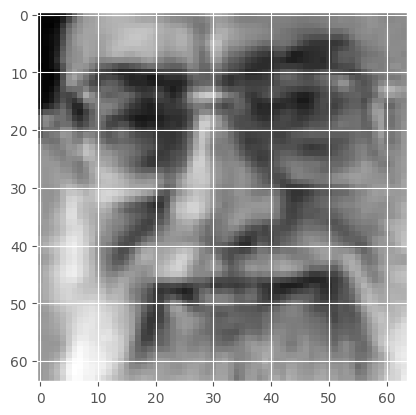

guess:  1
%:  [43 57]


In [ ]:
plt.imshow(X_test[20].reshape(64, 64), cmap='gray')
plt.show()

preds = predictions[20]
guess = np.argmax(preds)
perc = np.rint(preds * 100).astype(int)

print('guess: ', guess)
print('%: ', perc)

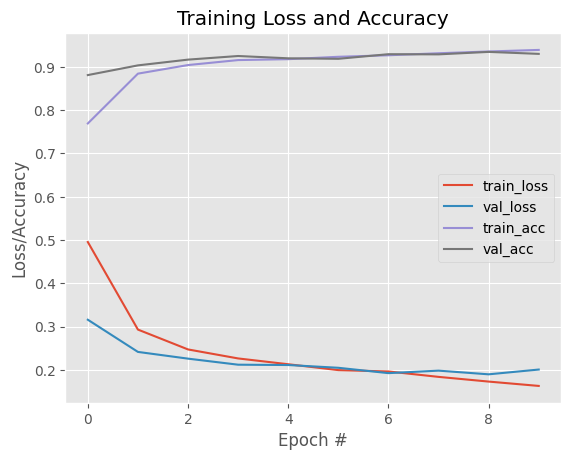

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()